# Goal of the project
- To find and explain the correlation between life expectancy and GDP of six countries 
- To explore and clean the dataset  

# Data
- The data is gathered from the World Health Organization and the World Bank
- stored as `add_csv.csv`

# Analysis 
In this project, I will try to perform both univariate analysis and bivariate analysis, answering the following questions:
- What is the average life expectancy of those six countries?
- What is the trend of average life expectancy?
- What is the trend of GDP of those countries? 
- What is the relationship between GDP and average life expectancy? Do people living in a developing country have lower life expectancy?
- What is the distribution of life expectancy?


In [1]:
# import the necessary library and load the data
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
# set the style 
sns.set_theme(style="whitegrid", palette="pastel", font_scale= .8)
sns.set_context("notebook")

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
# inspect the data type and missing value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


#### What is the average life expectancy of those six countries?

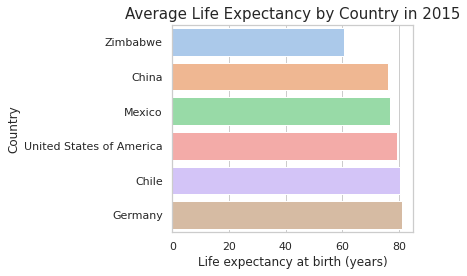

In [5]:
plt.clf()
ax = plt.subplot()
sns.barplot(
    data = df[df.Year == 2015].sort_values(by = "Life expectancy at birth (years)"),
    x = "Life expectancy at birth (years)",
    y = "Country"
)
ax.set_title("Average Life Expectancy by Country in 2015", fontsize = 15)
plt.tight_layout()
plt.show()

- On average, people in Zimbabwe have the least average life expectancy (60 yrs), following by China and Mexico (about 75 yrs)
- Germany and Chile have highest average life expectancy (80 yrs)
- Can this phenomonen be attributed to GDP or economic status of one country?


#### What is the trend of average life expectancy?

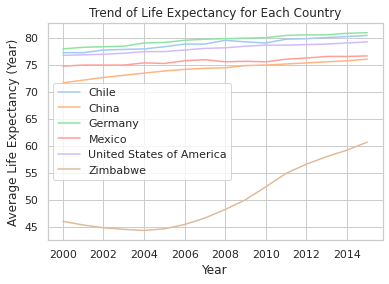

In [6]:
plt.clf()
countries = df.Country.unique()
for country in countries:
    country_df = df[df.Country == country]
    country_life_exp = country_df["Life expectancy at birth (years)"]
    plt.plot(country_df.Year, country_life_exp, label = country)
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy (Year)")
plt.title("Trend of Life Expectancy for Each Country")
plt.legend()
plt.show()


- Generally the average life expectancy for people are increasing for each country
- Among all, we can see average life expectancy for people in Zimbabwe have significantly increased from 2004 to 2015
- Also, the difference of life expectancy between Zimbabwe and other countries are singificant, so the data basically are sperated  as two group - Zimbabwe versus Rest

#### What is the trend of GDP of those countries? 

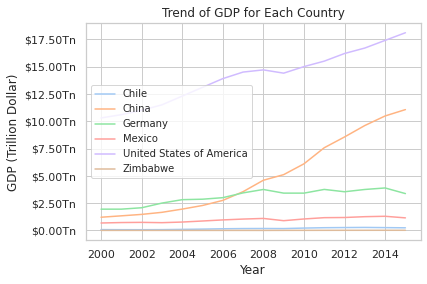

In [7]:
plt.clf()
ax = plt.subplot()
countries = df.Country.unique()
for country in countries:
    country_df = df[df.Country == country]
    country_gdp = country_df.GDP
    plt.plot(country_df.Year, country_gdp, label = country)
plt.xlabel("Year")
plt.ylabel("GDP (Trillion Dollar)")
plt.title("Trend of GDP for Each Country")
plt.legend(fontsize = 10, loc = "center left")

# format y label
from matplotlib.ticker import FuncFormatter
def trillion(y, pos):
    """
    Given the y value and its tick position,
    change the format of y value (in terms of trillion)
    """
    return f"${y*1e-12:.2f}Tn"
formatter = FuncFormatter(trillion)
ax.yaxis.set_major_formatter(formatter)

plt.show()


From the figure, we can see that,
- GDP of China and USA are growing rapidly in the recent year, but the growth of other countries are relatively small
- Generally, each country experience growth of GDP
- Zimabwe/ Chile/ Mexico are both developing countries (low GDP)
- While USA/ China/ Germany are developed countries (high GDP)

#### What is the relationship between GDP and average life expectancy? Do people living in a developing country have lower life expectancy?

Text(0.5, 1.0, 'GDP vs Life Expectancy (For USA and China)')

<Figure size 432x288 with 0 Axes>

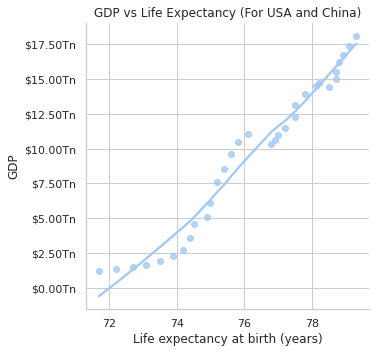

In [8]:
plt.clf()
g = sns.lmplot(
    data = df[np.isin(df.Country, ["United States of America", "China"])],
    x = "Life expectancy at birth (years)",
    y = "GDP",
    #hue = "Country",
    lowess = True
)
g.ax.formatter = FuncFormatter(trillion)
g.ax.yaxis.set_major_formatter(formatter)
g.ax.set_title("GDP vs Life Expectancy (For USA and China)")

- If we just include data from China and USA, we can clearly see that there is positive correlation between GDP and life expectancy

Text(0.5, 1.0, 'GDP vs Life Expectancy')

<Figure size 432x288 with 0 Axes>

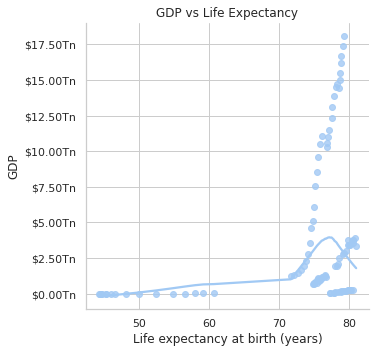

In [9]:
plt.clf()
g = sns.lmplot(
    data = df,
    x = "Life expectancy at birth (years)",
    y = "GDP",
    #hue = "Country",
    lowess = True
)
g.ax.formatter = FuncFormatter(trillion)
g.ax.yaxis.set_major_formatter(formatter)
g.ax.set_title("GDP vs Life Expectancy")

- However, if we include data point from all countries, we can see some nonlinear pattern in the data (no clear correlation)
- Why is it the case?
- We further explore the data through grouping the data point by country

Text(0.5, 1.0, 'GDP vs Life Expectancy')

<Figure size 432x288 with 0 Axes>

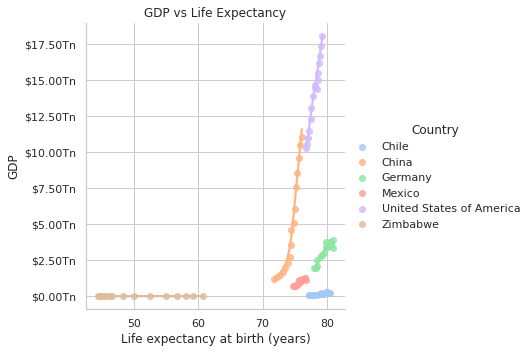

In [10]:
plt.clf()
g = sns.lmplot(
    data = df,
    x = "Life expectancy at birth (years)",
    y = "GDP",
    hue = "Country",
    lowess = True
)
g.ax.formatter = FuncFormatter(trillion)
g.ax.yaxis.set_major_formatter(formatter)
g.ax.set_title("GDP vs Life Expectancy")

From the figure, we can see that:
- For a country, there is clear correlation between GDP and life expectancy 
- However, if we compare country to country, there is no correlation between GDP and life expectancy 
- A low GDP country is not necessarily have low life expectancy (eg. Chile). Chile has highest life expectancy, despite the low level of GDP.
- This can happen because there may be other attribute for a country to affect the average life expectancy(eg. culture, food, geographical factor e.t.c)


#### What is the distribution of life expectancy?


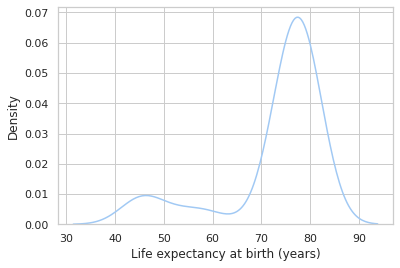

In [11]:
plt.clf()
sns.kdeplot(
    data = df,
    x = "Life expectancy at birth (years)",
    #hue = "Country",
    palette = "deep"
)
plt.show()


- The distribution is bimodal(have two peak)
- One around 45 yrs, another around 75 yrs
- The main reason is that people in Zimbabwe have significantly lower life expectancy than other countries, making the distribution skewed to left(Zimbabwe as outliner)

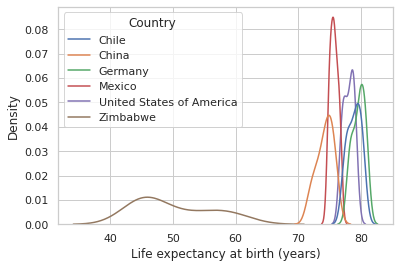

In [12]:
plt.clf()
sns.kdeplot(
    data = df,
    x = "Life expectancy at birth (years)",
    hue = "Country",
    palette = "deep"
)
plt.show()

- we can split the distribution like this 

#### Conclusion 
- GDP and life expectancy are increasing as time progress
- There is no clear correlation between GDP and life expectancy. 
- Although higer GDP often correlate with higher life expectancy, a low GDP country is not necessarily have low life expectancy

#### Further Question
- What is the other factor affecting average life expectancy for people in a country ?
- Why do Chile have high life expectancy even its GDP is low comparing to other countries?
- What cause the tremendous difference of average life expectancy bewteen Zimbabwe and Chile (they are both developing countries)?